In [2]:
#import libraries
import pandas as pd 
import numpy as np
import os
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import random

In [5]:
data_path = rf"C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data"
train_data_path = rf"C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data\Train"
test_data_path = rf"C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data\Test"

In [4]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [6]:
#checking for the number of labels
numbers = len(os.listdir(train_data_path))
print(numbers)

43


In [7]:
#load the data
labels = []
images_data = []

for i in range (42):
    path = data_path + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
          image = cv2.imread(path + '/' + img) 
          image = cv2.resize(image, (30, 30))
          image = image/255
          images_data.append(image.reshape(30, 30, 3))
          labels.append(i)
        
        except:
           print("Error in " + img)
            

In [8]:
#convert the data into numpy array for the training
labels = np.array(labels)
images_data = np.array(images_data)

In [65]:
#checking the shape of the data
print(f"images data shape: ", images_data.shape)
print(f"labels data shape: ", labels.shape)

images data shape:  (38969, 30, 30, 3)
labels data shape:  (38969,)


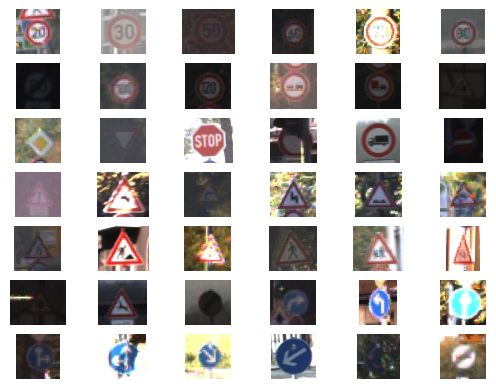

In [9]:
#visualizing first image from each category
from matplotlib.image import imread

for i in range(42):
    images_files = os.listdir(train_data_path + '/' + str(i))
    for img in images_files:
        plt.subplot(7, 6, i+1)
        img_path = os.path.join(train_data_path + '/' + str(i) + '/' + img)
        image = imread(img_path)
        plt.imshow(image)
        plt.grid(False)
        plt.axis('off')
        break

In [10]:
#load the test data
test_data = []
for img in os.listdir(test_data_path):
        path = os.path.join(test_data_path, img)
        test_image = cv2.imread(path)
        if test_image is None:
                print('image is none')
                continue
        test_image = cv2.resize(test_image, (30, 30))
        test_image = test_image/255
        test_image = test_image.reshape(30, 30, 3)
        test_data.append(test_image)



image is none


In [11]:
#split the data for the train and validation

x_train, x_val, y_train, y_val = train_test_split(images_data, labels, test_size=0.2, random_state=42)

In [79]:
#checking the shape of the train and validation set
print(y_train.shape)
print(y_val.shape)

(31175,)
(7794,)


In [ ]:
#build the model
model = Sequential([
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape = (30, 30, 3)),
    Conv2D(filters = 32, kernel_size= (3,3), activation= 'relu', input_shape = (30, 30, 3)),
    MaxPool2D(pool_size=(2,2)),
    BatchNormalization(axis = 1),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape = (30, 30, 3)),
    Conv2D(filters = 128, kernel_size= (3,3), activation= 'relu', input_shape = (30, 30, 3)),
    MaxPool2D(pool_size=(2,2)),
    BatchNormalization(axis = 1),
    Flatten(),1
    Dense(units=512, activation='relu'),
    BatchNormalization(),
    Dropout(rate=0.5),
    Dense(units=43, activation='softmax')
])

model.compile(optimizer = 'adam', loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(x_train, y_train, callbacks = [early_stop], validation_data = (x_val, y_val), batch_size = 32, epochs = 30)

Epoch 1/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 46s 42ms/step - accuracy: 0.7165 - loss: 1.1611 - val_accuracy: 0.9850 - val_loss: 0.0563
Epoch 2/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.9878 - loss: 0.0525 - val_accuracy: 0.9809 - val_loss: 0.0604
Epoch 3/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.9923 - loss: 0.0285 - val_accuracy: 0.9820 - val_loss: 0.0694
Epoch 4/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 38s 39ms/step - accuracy: 0.9936 - loss: 0.0225 - val_accuracy: 0.9940 - val_loss: 0.0235
Epoch 5/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.9940 - loss: 0.0200 - val_accuracy: 0.9923 - val_loss: 0.0263
Epoch 6/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.9946 - loss: 0.0171 - val_accuracy: 0.9881 - val_loss: 0.0370
Epoch 7/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 51s 52ms/step - accuracy: 0.9943 - loss: 0.0189 - val_accuracy: 0.9958 - val_loss: 0.0166
Epoch 8/30
704/975 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9951 - loss: 0.0161